## Finding which marketing channels are the biggest drivers to predict sales using multiple linear regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [62]:
data = pd.read_csv('C:/Users/NOON/Documents/Github Projects/Multiple Linear Regression/marketing_data.csv')

In [63]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [64]:
data.shape

(572, 5)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [66]:
data.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.646472,3.248471,193.516937
std,9.650740,2.195696,90.516153
min,0.194576,0.013230,31.199409
25%,10.878554,1.447163,118.544562
50%,18.810430,2.945318,198.521410
75%,25.838296,4.791290,268.567987
max,48.871161,11.260430,358.420739


In [67]:
data.isnull().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [68]:
data = data.dropna(axis=0).reset_index(drop=True)

In [69]:
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [70]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [71]:
data.duplicated().sum()

0

In [72]:
data.describe(include='all')

,TV,Radio,Social Media,Influencer,Sales
count,569,569.000000,569.000000,569,569.000000
unique,3,NaN,NaN,4,NaN
top,Medium,NaN,NaN,Mega,NaN
freq,197,NaN,NaN,147,NaN
mean,NaN,18.587974,3.240304,NaN,193.457340
std,NaN,9.616712,2.198120,NaN,90.328538
min,NaN,0.194576,0.013230,NaN,31.199409
25%,NaN,10.867073,1.437485,NaN,118.742719
50%,NaN,18.744512,2.920709,NaN,198.521410
75%,NaN,25.697364,4.790840,NaN,267.803610


In [73]:
data.dtypes

TV               object
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [74]:
data = data.rename(columns={'Social Media':'Social_Media'})

In [75]:
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [76]:
data['Influencer'].value_counts(normalize=True)*100

Mega     25.834798
Nano     25.834798
Micro    25.483304
Macro    22.847100
Name: Influencer, dtype: float64

In [77]:
data['TV'].value_counts(normalize=True)*100

Medium    34.622144
Low       34.446397
High      30.931459
Name: TV, dtype: float64

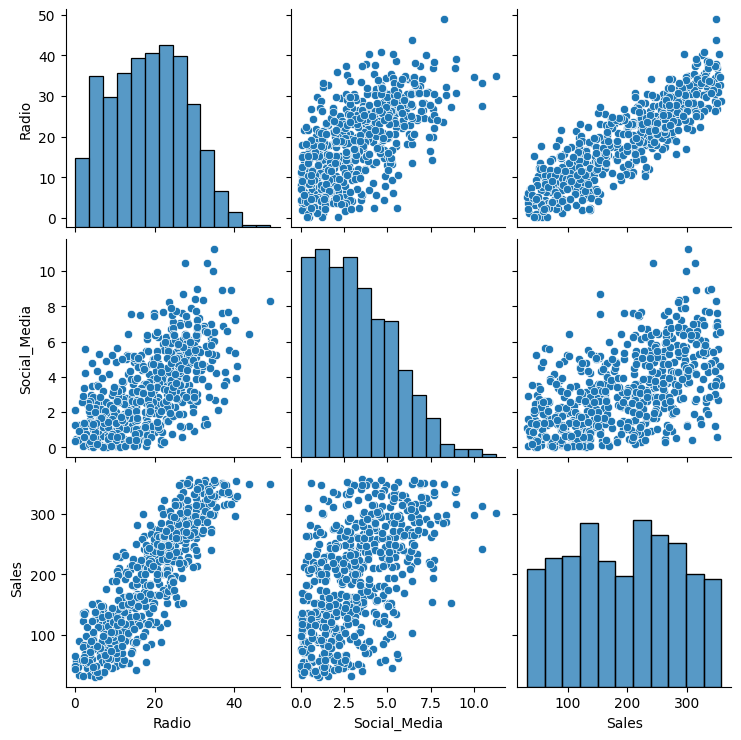

In [78]:
sns.pairplot(data)

In [79]:
data.groupby('Influencer')['Sales'].mean()

Influencer
Macro    206.641805
Mega     180.385096
Micro    198.655080
Nano     189.742830
Name: Sales, dtype: float64

In [80]:
data.groupby('TV')['Sales'].mean()

TV
High      300.529591
Low        91.716309
Medium    199.023461
Name: Sales, dtype: float64

In [92]:
ols_formula = 'Sales ~ C(TV) + Radio'

In [93]:
OLS = ols(formula = ols_formula, data=data)

In [94]:
model= OLS.fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          1.61e-287
Time:                        00:10:50   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
residuals = model.resid

Text(0.5, 1.0, 'Histogram of Residuals')

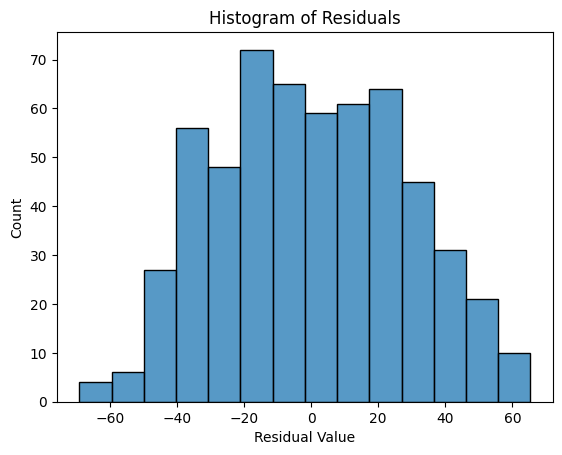

In [104]:
fig1 = sns.histplot(x=residuals)
fig1.set_xlabel('Residual Value')
fig1.set_title('Histogram of Residuals')


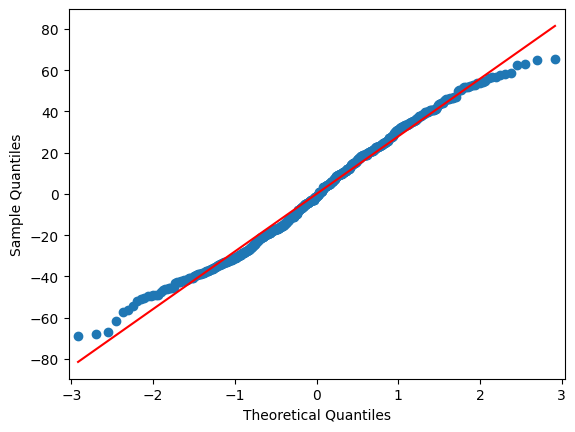

In [111]:
fig = sm.qqplot(residuals, line='s')

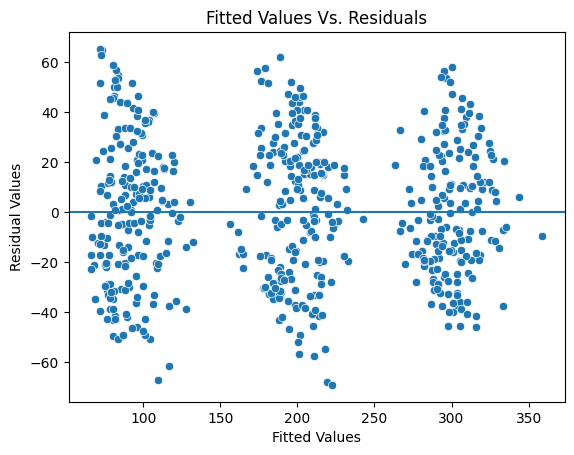

In [114]:
fig3 = sns.scatterplot(x=model.fittedvalues, y=model.resid)
fig3.set_xlabel('Fitted Values')
fig3.set_ylabel('Residual Values')
fig3.set_title('Fitted Values Vs. Residuals')
fig3.axhline(0)
plt.show()

In [115]:
X = data[['Radio', 'Social_Media']]

In [116]:
X.head()

,Radio,Social_Media
0,1.218354,1.270444
1,14.949791,0.274451
2,10.377258,0.061984
3,26.469274,7.070945
4,36.876302,7.618605


In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [132]:
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

In [133]:
df_vif.head()

,VIF
Radio,4.93238
Social_Media,4.93238
